In [1]:
teacher_utterance = "To wipe almonds do it slowly and gently"

In [2]:
from gently.concepts import Concept, Behaviour
from gently.BezierCurves import BehaviourCurve
from gently.agent import GentlyAgent
from enum import Enum

In [3]:
import numpy as np
from scipy.special import erf
from scipy.stats import norm

import bezier
import numpy as np
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

In [4]:
dialogue = {
    "u_1": "to wipe milk do it left and slowly",
    "a_1": BehaviourCurve(0.5, 0.1, 0.8),
    "u_2": "no, left",
    "a_2": BehaviourCurve(0.4, 0.6, 0.4),
    "u_3": "no, slowly and left",
    "a_3": BehaviourCurve(-0.3, 0.2, 0.6),
    "u_4": "yes"
}

In [5]:
agent = GentlyAgent()

In [6]:
agent.interpret_command(None, dialogue["u_1"])
print(agent.behaviours["wipe milk"].curve_concept.mean, agent.behaviours["wipe milk"].curve_concept.variance)
agent.interpret_command(dialogue["a_1"], dialogue["u_2"])
print(agent.behaviours["wipe milk"].curve_concept.mean, agent.behaviours["wipe milk"].curve_concept.variance)
agent.interpret_command(dialogue["a_2"], dialogue["u_3"])
print(agent.behaviours["wipe milk"].curve_concept.mean, agent.behaviours["wipe milk"].curve_concept.variance)
agent.interpret_command(dialogue["a_3"], dialogue["u_4"])
print(agent.behaviours["wipe milk"].curve_concept.mean, agent.behaviours["wipe milk"].curve_concept.variance)

0 0.5
-0.2499999999 0.3413447460685429
-0.3396278734774404 0.32192911870529206
-0.31981393673872016 0.16135715144173204


In [10]:
class HumanTeacher(object):
    
    def __init__(self):
        pass
    
    def get_correction(self, behaviour):
        behaviour.plot()
        plt.show()
        correction = input("Give feedback:")
        return correction

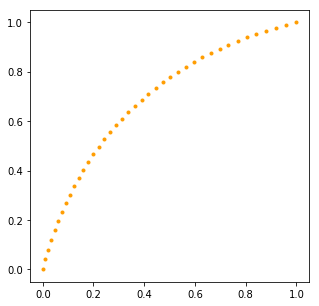

Give feedback: yes


'yes'

In [11]:
teacher = HumanTeacher()
teacher.get_correction(dialogue["a_3"])

In [ ]:
def do_scenario(agent, teacher, world):
    

In [9]:
b = parse_sentence(dialogue["u_1"])

In [10]:
parse_sentence(dialogue["u_3"])

(['slowly', 'left'], <ResponseType.correction: 2>)

In [11]:
b.energy_concept.name

AttributeError: 'tuple' object has no attribute 'energy_concept'

In [6]:
class Command(object):
    
    def __init__(self, name, attributes):
        self.name = name
        self.attributes = attributes
    
    @staticmethod
    def parse_sentence(sentence):
        command, attributes = sentence.split(',')
        command_name = command.replace('To', '').strip().replace(' ', '_')
        words = attributes.strip().split()
        if words[0] == 'do' and words[1] == 'it':
            attributes = words[2:]
        else:
            attributes = words[1:]
        words = [word.strip().strip(',') for word in words if word != 'and']
        return Command(command_name, words)

In [7]:
command_under_discussion = Command.parse_sentence(dialogue['u_1'])

NameError: name 'dialogue' is not defined

In [8]:
# are we assuming that if I say "no do it more gently" then that's the only thing which is definitely wrong?

In [8]:
m_true = 1
sig_true = 0.5
data = np.random.normal(m_true, sig_true, 100)

NameError: name 'np' is not defined

In [45]:
m_0 = 0
n_0 = 1
v_0 = 1
sig_0 = 1
for dp in [0.25]*10:
    sig_0, v_0 = negative_variance2(sig_0, v_0, n_0, dp, m_0)
    print("updated, sigma", sig_0)

0.5987063256829237
0.1974126513658474
updated, sigma 0.1974126513658474
0.8973119796116928
0.7946239592233857
updated, sigma 0.15686882262911558
0.9444970617852662
0.8889941235705323
updated, sigma 0.1394554614887119
0.9634885108996136
0.9269770217992273
updated, sigma 0.129272008364443
0.9734376984202483
0.9468753968404966
updated, sigma 0.12240448422044996
0.9794445029450225
0.958889005890045
updated, sigma 0.11737231419063096
0.9834131279163765
0.966826255832753
updated, sigma 0.11347863506735323
0.9862046649307314
0.9724093298614629
updated, sigma 0.11034768347943845
0.9882610267579814
0.9765220535159629
updated, sigma 0.10775694647207072
0.9898305362607644
0.9796610725215289
updated, sigma 0.10556528575247379


In [33]:
m_0 = 0
n_0 = 1
v_0 = 1
sig_0 = 1
for dp in data:
    m_0, n_0, sig_0, v_0 = update_params(m_0, n_0, sig_0, v_0, dp)
    print("mean:", m_0)
    print("variance", np.sqrt(sig_0))

mean: 0.7877631955643327
variance 1.0585701924226514
mean: 0.9400567443060512
variance 0.8907490582840069
mean: 0.9585527172749595
variance 0.7720762376045409
mean: 0.9081830683928128
variance 0.6978751890222992
mean: 1.0510731994351767
variance 0.7127033725825992
mean: 1.0377029451696498
variance 0.660647372885859
mean: 1.0068701989603186
variance 0.6233399474283892
mean: 1.068800051417875
variance 0.613239449110675
mean: 1.1183603417528822
variance 0.6004684514225701
mean: 1.1415297006478713
variance 0.5771933442108792
mean: 1.137729157726699
variance 0.5527642917881117
mean: 1.1591735183311118
variance 0.5362489807185836
mean: 1.174345784872535
variance 0.5196299904387381
mean: 1.1781222930447235
variance 0.5022090932683817
mean: 1.1999463605263798
variance 0.4935533900684077
mean: 1.1653007365806116
variance 0.49846859715268377
mean: 1.1462930972416137
variance 0.4907228720071528
mean: 1.1750899128378354
variance 0.4930125770392193
mean: 1.1577412890277707
variance 0.48644306067295

In [21]:
m_0 = 0
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, 1)
    print(m_0)


-0.4999999999
-0.6481481480481481
-0.7401819821600026
-0.8062270910118698
-0.8573133435475054
-0.8987258581687712
-0.9333983842126214
-0.9631228999462633
-0.9890709676035764
-1.0120486783375924
-1.0326332477445244
-1.0512514865973877
-1.0682274389135487
-1.0838126306585687
-1.0982060071367885


In [23]:
m_0 = 0
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, 1, var=2)
    print(m_0)


-1.9999999996
-2.148148147777778
-2.249047801774348
-2.3248318472709175
-2.385139075619184
-2.4350055792901797
-2.477381106134302
-2.514135807771322
-2.5465266998227296
-2.5754375483713523
-2.601512310301223
-2.6252340661577236
-2.646974081731076
-2.6670235739725254
-2.685614995800798


In [20]:
m_0 = 0
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, 1, var=.5)
    print(m_0)


-0.124999999975
-0.1908436213653978
-0.23491641173597022
-0.2677028982934262
-0.29362998927873085
-0.31497133585688886
-0.3330438032362116
-0.3486755913064578
-0.3624199668609868
-0.3746640233305795
-0.38568869410045314
-0.3957040251509633
-0.4048709846158256
-0.41331552201993743
-0.42113795351560207


In [18]:
m_0 = 0
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, 1, var=.5)
    print(m_0)


-0.24999999995
-0.3566666666081333
-0.42458135368328787
-0.4738562238671495
-0.5122188663473307
-0.5434539490569501
-0.5696896495735488
-0.5922372279741126
-0.6119593870062059
-0.6294525816236881
-0.645145557419142
-0.6593563399657497
-0.6723270171474508
-0.6842459214595571
-0.6952623041188513


In [13]:
m_0 = 2
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, 1)
    print(m_0)


2.5000000001
2.6481481482481484
2.740181982360003
2.8062270912118703
2.857313343747506
2.8987258583687714
2.9333983844126217
2.963122900146264
2.9890709678035767
3.0120486785375933
3.0326332479445255
3.0512514867973883
3.0682274391135493
3.0838126308585694
3.098206007336789


In [14]:
m_0 = 0
n_0 = 1
for i in range(15):
    m_0, n_0 = negative_update(m_0, n_0, -.5)
    print(m_0)

2.0000000008
2.0533333341034665
2.0916797676945835
2.121455833733015
2.145708732801882
2.166117552944613
2.1837029194748276
2.199130172883947
2.2128564366418058
2.2252089033348814
2.236429582785591
2.246702365308327
2.2561701584659724
2.2649461599604606
2.2731215156986875


In [59]:
m_0 = 0
n_0 = 1
v_0 = 1
sig_0 = 1

dp = 10

a = norm.pdf(dp, m_0, sig_0)
b = norm.pdf(dp, 0, 100)
print("prob before", a/(a+b))

m_0, n_0, sig_0, v_0 = update_params(m_0, n_0, sig_0, v_0, dp)
print("mean:", m_0)
print("variance", np.sqrt(sig_0))

a = norm.pdf(dp, m_0, sig_0)
b = norm.pdf(dp, 0, 100)
print("prob after", a/(a+b))

dp2 = 6
a = norm.pdf(dp2, m_0, sig_0)
b = norm.pdf(dp2, 0, 100)
print("prob before", a/(a+b))

m_0, n_0, sig_0, v_0 = update_params_negative(m_0, n_0, sig_0, v_0, dp2)
print("mean:", m_0)
print("variance", np.sqrt(sig_0))

a = norm.pdf(dp2, m_0, sig_0)
b = norm.pdf(dp2, 0, 100)
print("prob after", a/(a+b))


a = norm.pdf(dp, m_0, sig_0)
b = norm.pdf(dp, 0, 100)
print("prob after dp1", a/(a+b))



prob before 1.9384177468094036e-20
mean: 5.0
variance 5.049752469181039
prob after 0.7945002295830467
prob before 0.7969796295977709
0.5156407862910157
0.03128157258203146
mean: -211.74999995665
variance 0.8931293863947162
prob after 0.0
prob after dp1 0.0


In [50]:
update_variance(0, 1, )

(20.25, 2)

In [81]:
m_0 = 0
n_0 = 1
v_0 = 1
sig_0 = 1

dp = 10

a = norm.pdf(dp, m_0, sig_0**(1/2))
b = norm.pdf(dp, 0, 100)
print("prob before", a/(a+b))

m_0, n_0, sig_0, v_0 = update_params(m_0, n_0, sig_0, v_0, dp)
print("mean:", m_0)
print("variance", np.sqrt(sig_0))

a = norm.pdf(dp, m_0, sig_0**(1/2))
b = norm.pdf(dp, 0, 100)
print("prob after", a/(a+b))

dp2 = 14
a = norm.pdf(dp2, m_0, sig_0**(1/2))
b = norm.pdf(dp2, 0, 100)
print("prob before", a/(a+b))

m_0, n_0, sig_0, v_0 = update_params_negative(m_0, n_0, sig_0, v_0, dp2, use_var=True)
print("mean:", m_0)
print("variance", np.sqrt(sig_0))

a = norm.pdf(dp2, m_0, sig_0**(1/2))
b = norm.pdf(dp2, 0, 100)
print("prob after", a/(a+b))


a = norm.pdf(dp, m_0, sig_0**(1/2))
b = norm.pdf(dp, 0, 100)
print("prob after dp1", a/(a+b))

a = norm.pdf(dp, m_0, sig_0**(1/2))
b = norm.pdf(dp, 0, 100)
print("prob before", a/(a+b))

m_0, n_0, sig_0, v_0 = update_params(m_0, n_0, sig_0, v_0, dp)
print("mean:", m_0)
print("variance", np.sqrt(sig_0))

a = norm.pdf(dp, m_0, sig_0**(1/2))
b = norm.pdf(dp, 0, 100)
print("prob after", a/(a+b))

prob before 1.9384177468094036e-20
mean: 5.0
variance 5.049752469181039
prob after 0.924186315546435
prob before 0.8033548467717047
0.6379337298055405
0.27586745961108106
mean: 4.895061728397393
variance 2.65228584810962
prob after 0.09511411644022813
prob after dp1 0.8559994419404298
prob before 0.8559994419404298
mean: 6.596707818931596
variance 3.2374288638129247
prob after 0.9469918735712802
